## To read the json file and it's context:


In [1]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [2]:
data_copy = data.copy
for item in data:
    item["title"] = item["title"].strip("12345()")
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()") for tag in item["tags"]]

In [9]:
all_tags = list()
for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

titles = list()
for item in data:
    titles.append(item["title"])

In [10]:
print(len(titles))
print(len(all_tags))

unique_tags = list(set(all_tags))
print(len(unique_tags))

266
1641
346


## To create Adjacency Matrix for title-tag Network:


In [11]:
import numpy as np
title_tag_adjacency_matrix = np.zeros((len(titles), len(unique_tags)))
tags_indices = {word:index for index, word in enumerate(unique_tags)}
title_indices = {title:index for index, title in enumerate(titles)}

In [14]:
for item in data:
    if "tags" in item.keys():
        index1 = title_indices[item["title"]]
        for i in range(len(item["tags"])):
            tag = item["tags"][i]
            index2 = tags_indices[tag]
            title_tag_adjacency_matrix[index1][index2] = 1

file_path = 'title-tag_adjacency_matrix.txt'
np.savetxt(file_path, title_tag_adjacency_matrix, fmt='%d')

## To create Adjacency Matrix for co-word Network:

In [15]:
import numpy as np
coword_adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [16]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                coword_adjacency_matrix[index1][index2] = 1
                coword_adjacency_matrix[index2][index1] = 1

file_path = 'co-word_adjacency_matrix.txt'
np.savetxt(file_path, coword_adjacency_matrix, fmt='%d')

In [22]:
import pandas as pd
title_tag_dataframe = pd.DataFrame(title_tag_adjacency_matrix, columns=unique_tags, index=titles)

# Save the DataFrame to a file
file_path = 'title-tag_adjacency_matrix.csv'
title_tag_dataframe.to_csv(file_path)

In [21]:
import pandas as pd
coword_dataframe = pd.DataFrame(coword_adjacency_matrix, columns=unique_tags, index=unique_tags)

# Save the DataFrame to a file
file_path = 'coword_adjacency_matrix.csv'
coword_dataframe.to_csv(file_path)

### To Create the edge list:

In [24]:
tag_title_edge_list = np.transpose(np.nonzero(title_tag_adjacency_matrix)).tolist()
# tag_title_edge_list

### To Create sparse matrix:

In [25]:
from scipy.sparse import coo_matrix
num_nodes = np.max(tag_title_edge_list) + 1
source_nodes, target_nodes = zip(*tag_title_edge_list)
sparse_matrix = coo_matrix((np.ones(len(tag_title_edge_list)), (source_nodes, target_nodes)), shape=(num_nodes, num_nodes))

print(sparse_matrix)

  (0, 210)	1.0
  (0, 260)	1.0
  (0, 310)	1.0
  (1, 72)	1.0
  (1, 103)	1.0
  (1, 119)	1.0
  (1, 338)	1.0
  (2, 128)	1.0
  (2, 144)	1.0
  (2, 227)	1.0
  (2, 235)	1.0
  (3, 110)	1.0
  (3, 160)	1.0
  (4, 111)	1.0
  (4, 168)	1.0
  (4, 215)	1.0
  (4, 277)	1.0
  (4, 292)	1.0
  (5, 156)	1.0
  (5, 171)	1.0
  (5, 295)	1.0
  (6, 64)	1.0
  (6, 144)	1.0
  (6, 238)	1.0
  (7, 302)	1.0
  :	:
  (263, 244)	1.0
  (263, 253)	1.0
  (263, 284)	1.0
  (263, 328)	1.0
  (263, 337)	1.0
  (264, 3)	1.0
  (264, 14)	1.0
  (264, 31)	1.0
  (264, 123)	1.0
  (264, 137)	1.0
  (264, 244)	1.0
  (264, 253)	1.0
  (264, 284)	1.0
  (264, 328)	1.0
  (264, 337)	1.0
  (265, 3)	1.0
  (265, 14)	1.0
  (265, 31)	1.0
  (265, 123)	1.0
  (265, 137)	1.0
  (265, 244)	1.0
  (265, 253)	1.0
  (265, 284)	1.0
  (265, 328)	1.0
  (265, 337)	1.0


In [27]:
co_word_sparse = sparse_matrix * sparse_matrix
print(co_word_sparse)

  (0, 337)	1.0
  (0, 328)	1.0
  (0, 284)	1.0
  (0, 253)	1.0
  (0, 244)	1.0
  (0, 137)	1.0
  (0, 123)	1.0
  (0, 31)	1.0
  (0, 14)	1.0
  (0, 3)	1.0
  (0, 259)	1.0
  (1, 221)	1.0
  (1, 213)	1.0
  (1, 207)	1.0
  (1, 159)	1.0
  (1, 147)	1.0
  (1, 81)	1.0
  (1, 71)	1.0
  (1, 345)	1.0
  (1, 187)	1.0
  (1, 162)	1.0
  (1, 92)	1.0
  (1, 224)	1.0
  (1, 98)	1.0
  (1, 50)	1.0
  :	:
  (265, 247)	1.0
  (265, 173)	1.0
  (265, 170)	1.0
  (265, 120)	1.0
  (265, 79)	1.0
  (265, 34)	1.0
  (265, 320)	2.0
  (265, 291)	1.0
  (265, 270)	1.0
  (265, 257)	1.0
  (265, 250)	1.0
  (265, 211)	1.0
  (265, 180)	1.0
  (265, 151)	1.0
  (265, 138)	1.0
  (265, 131)	1.0
  (265, 121)	1.0
  (265, 109)	1.0
  (265, 63)	1.0
  (265, 42)	1.0
  (265, 28)	1.0
  (265, 26)	1.0
  (265, 23)	1.0
  (265, 160)	1.0
  (265, 110)	1.0


### To draw the graph:

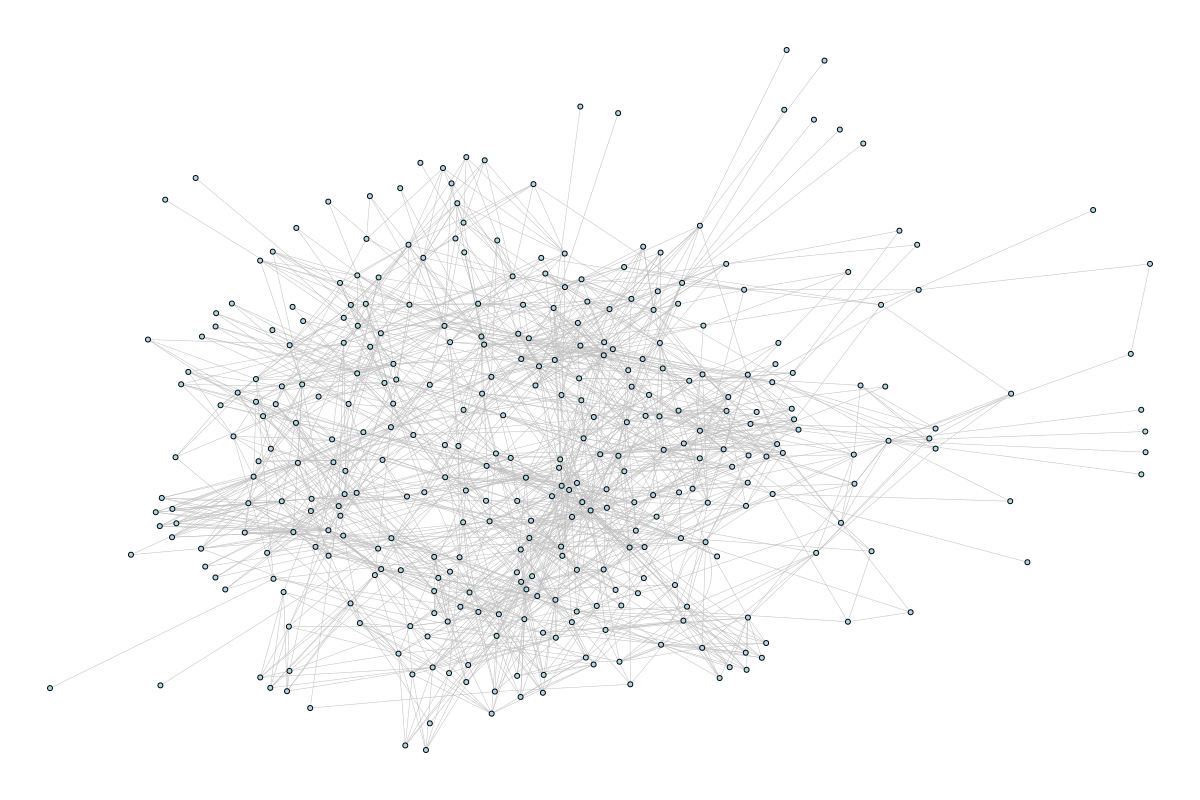

In [65]:
import igraph as ig
graph = ig.Graph.Adjacency(sparse_matrix.todense().tolist())
graph.es["arrow_size"] = 0.001

layout = graph.layout_fruchterman_reingold()
ig.plot(graph, bbox=(0, 0, 1200, 800), area=3500, vertex_size=5, vertex_color='lightblue', edge_color='gray', edge_width=0.5, arrow_size=graph.es["arrow_size"], margin=50)